In [1]:
import pandas as pd
import numpy as np

from lib.drawing import hist_compare

import matplotlib.pyplot as plt

import os
from os.path import isfile, join

%matplotlib inline

In [14]:
# read data file
datafolder = 'data/'
datafile = 'myo5b_variants_patho_benign_cadd1.3fullannot_v1.xlsx'
datatable = pd.ExcelFile(os.path.join(datafolder,datafile))
datatable_pd = datatable.parse(datatable.sheet_names[0])

In [15]:


# delete some columns that were not used in cadd paper
del_cols = ['CHROM','POS','ID','isDerived','AnnoType','ConsScore',
            'ConsDetail','mapAbility20bp','mapAbility35bp',
            'scoreSegDup','isKnownVariant','ESP_AF','ESP_AFR',
            'ESP_EUR','TG_AF','TG_ASN','TG_AMR','TG_AFR','TG_EUR',
            'GeneID','FeatureID','CCDS','GeneName','Exon',
            'Intron']
datatable_pd = datatable_pd.drop(columns=del_cols)

# # delete columns without a single value
for col in datatable_pd.columns:
    null = datatable_pd[col].isnull().values.sum()
    if null >= datatable_pd.shape[0]:
        datatable_pd = datatable_pd.drop([col],axis=1)
# datatable_pd = datatable_pd.dropna(axis=1,how='all')

# # fill in values recommended by cadd paper
values = {'GerpRS':0, 'GerpRSpval':1,'EncExp':0,'EncOCC':5,'EncOCCombPVal':0,
          'EncOCDNasePVal':0,'EncOCFairePVal':0,'EncOCpolIIPVal':0,'EncOCctcfPVal':0,
          'EncOCmycPVal':0,'EncOCDNaseSig':0,'EncOCFaireSig':0,'EncOCpolIISig':0,
          'EncOCctcfSig':0,'EncOCmycSig':0,'tOverlapMotifs':0,'motifDist':0,
          'TFBS':0,'TFBSPeaksMax':0,'PolyPhenVal':0,'SIFTval':0,'TFBSPeaks':0}
datatable_pd = datatable_pd.fillna(values)

In [16]:
datatable_pd.shape

(248, 87)

In [17]:
for col in datatable_pd.columns:
    null = datatable_pd[col].isnull().values.sum()
    if null > 0:
        print(null, col)

30 isTv
230 mirSVR-Score
230 mirSVR-E
230 mirSVR-Aln
40 cDNApos
40 relcDNApos
58 CDSpos
58 relCDSpos
58 protPos
58 relProtPos
73 Domain
160 Dst2Splice
160 Dst2SplType
78 oAA
78 nAA
141 Grantham
141 PolyPhenCat
141 SIFTcat


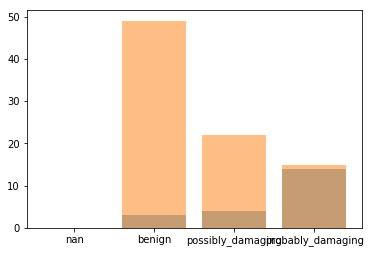

In [39]:
hist_compare(datatable_pd,'PolyPhenCat')

In [35]:
# delete isTv, mirSVR-Score, Domain, 
# keep mirSVR-E, cDNApos, relcDNApos, CDSpos, protPos, 
# relCDSpos, Dst2Splice, Dst2SpliType, SIFTcat, Grantham, oAA, nAA, PolyPhenCat

# for object features, turn into dummmies and delete the notapplicable column

30 isTv
230 mirSVR-Score
230 mirSVR-E
230 mirSVR-Aln
40 cDNApos
40 relcDNApos
58 CDSpos
58 relCDSpos
58 protPos
58 relProtPos
73 Domain
160 Dst2Splice
160 Dst2SplType
78 oAA
78 nAA
141 Grantham
141 PolyPhenCat
141 SIFTcat


ID


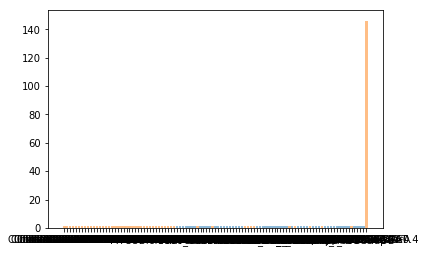

REF


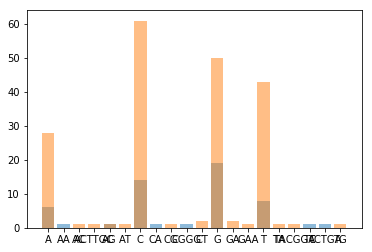

ALT


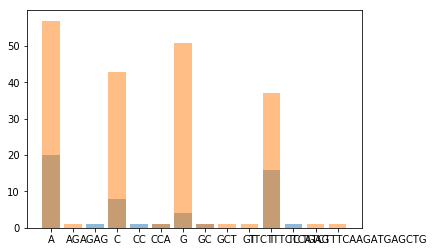

INFO


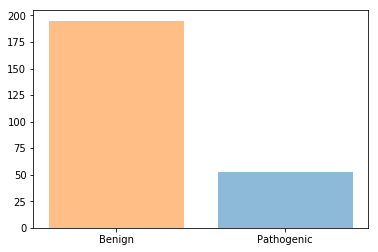

Type


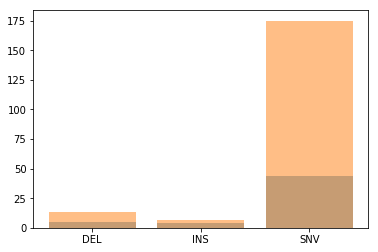

isTv


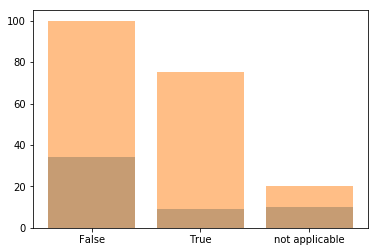

AnnoType


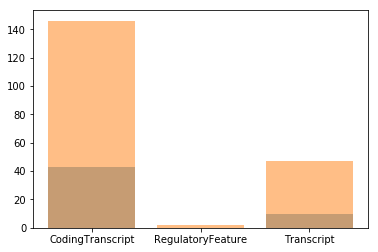

Consequence


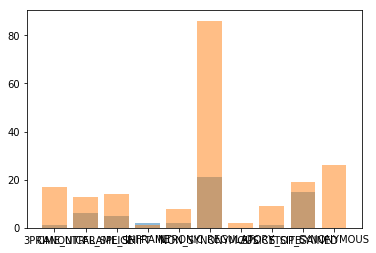

ConsDetail


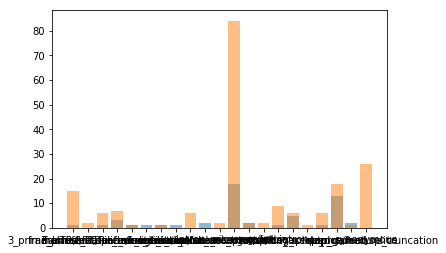

Segway


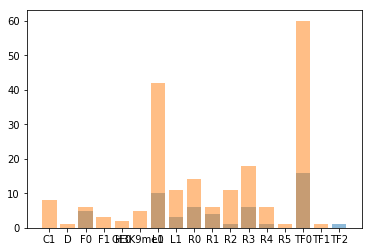

GeneID


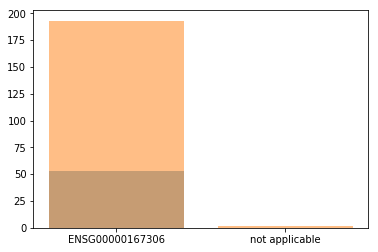

FeatureID


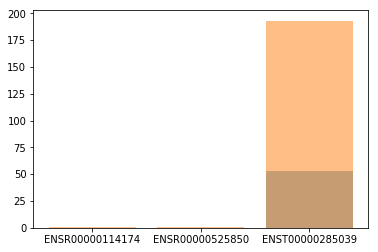

CCDS


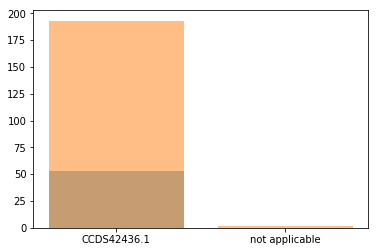

GeneName


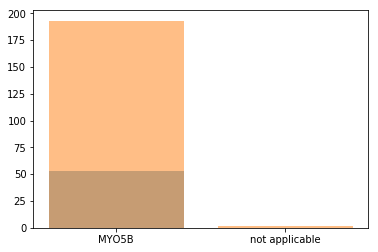

Domain


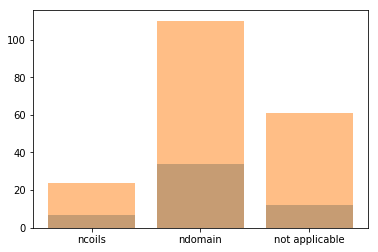

Dst2SplType


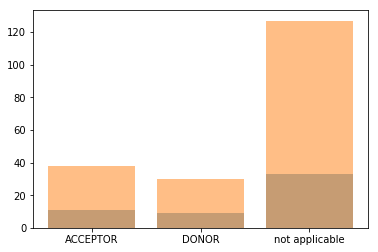

Exon


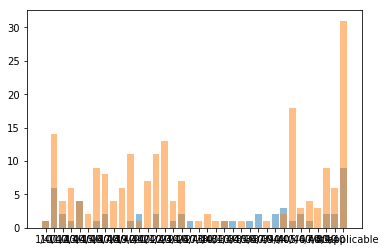

Intron


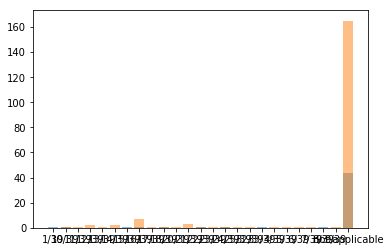

oAA


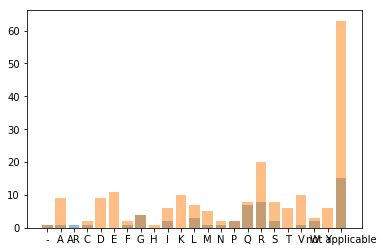

nAA


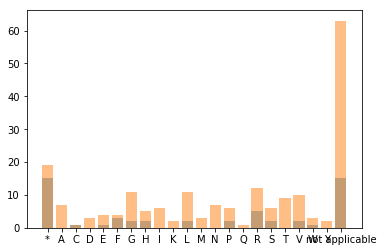

PolyPhenCat


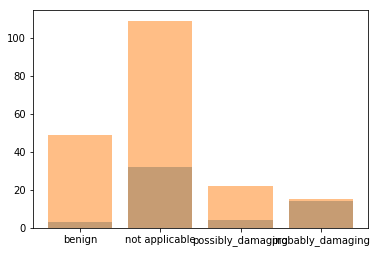

SIFTcat


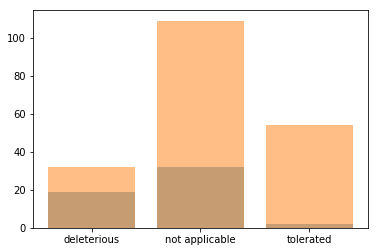

In [10]:
for col in datatable_pd.select_dtypes([np.object]).columns:
    datatable_pd[col] = datatable_pd[col].fillna('not applicable')
    print(col)
    hist_compare(datatable_pd,col)

CHROM


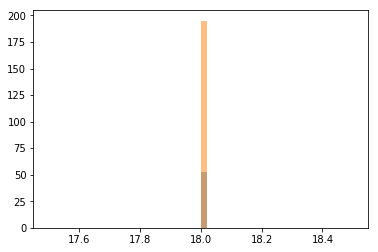

POS


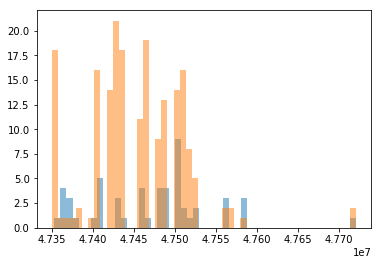

Length


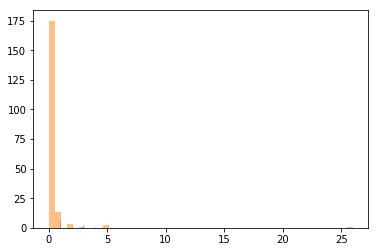

isDerived


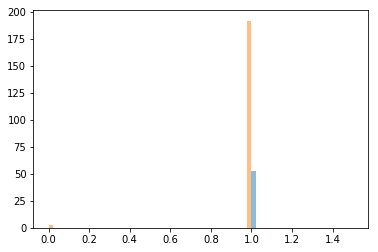

ConsScore


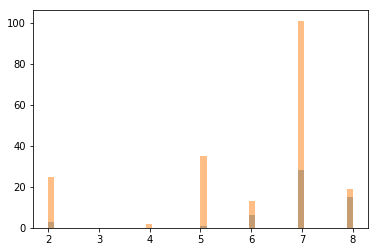

GC


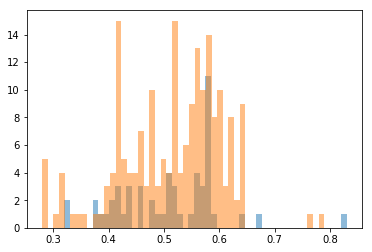

CpG


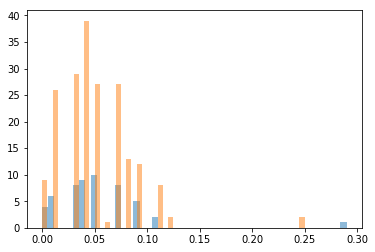

mapAbility20bp


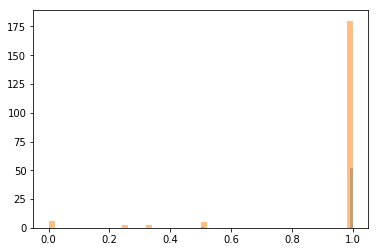

mapAbility35bp


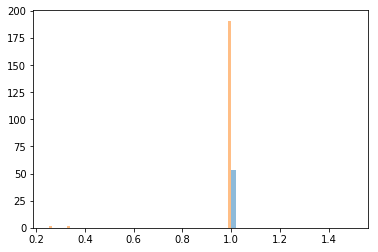

scoreSegDup


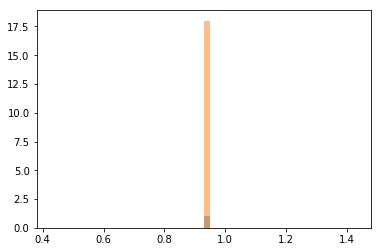

priPhCons


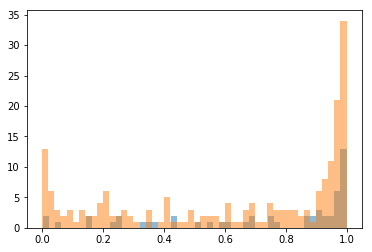

mamPhCons


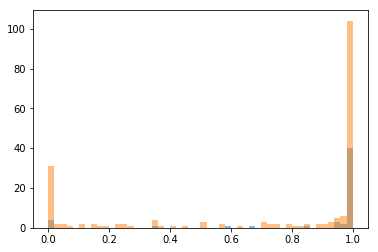

verPhCons


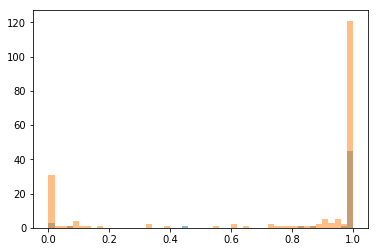

priPhyloP


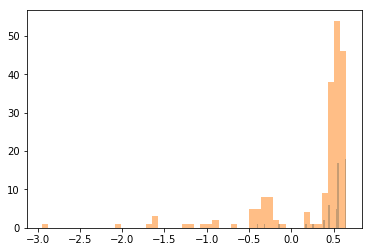

mamPhyloP


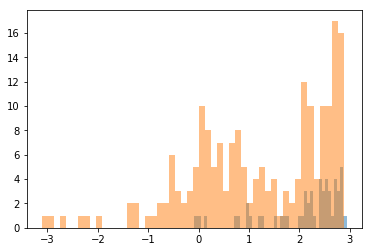

verPhyloP


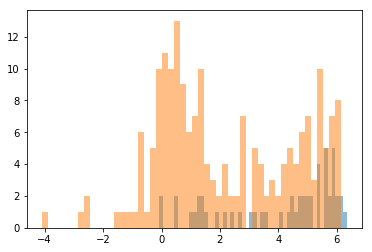

GerpN


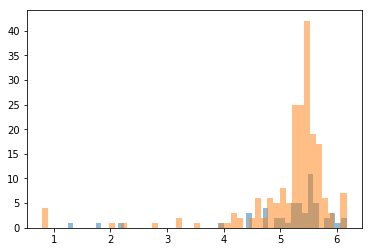

GerpS


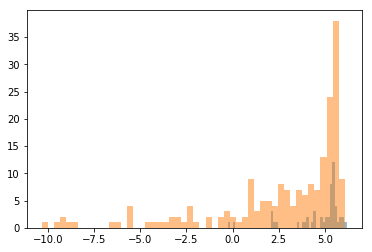

GerpRS


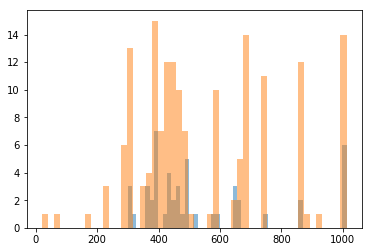

GerpRSpval


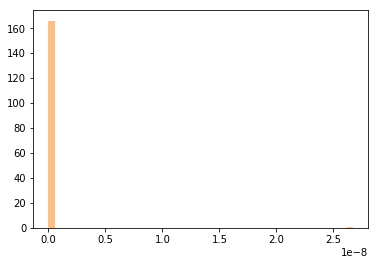

bStatistic


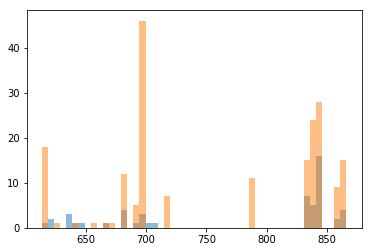

mutIndex


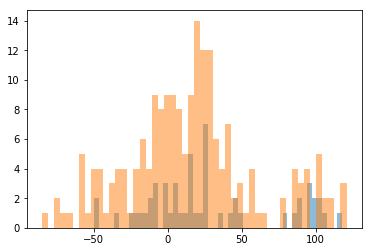

dnaHelT


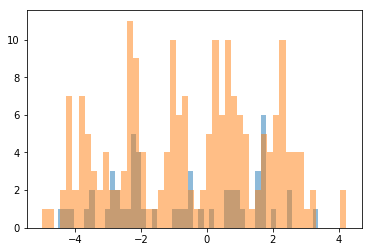

dnaMGW


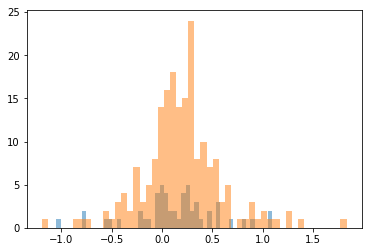

dnaProT


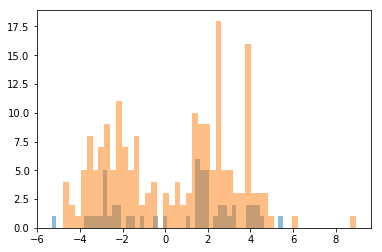

dnaRoll


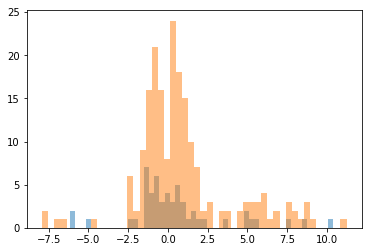

mirSVR-Score


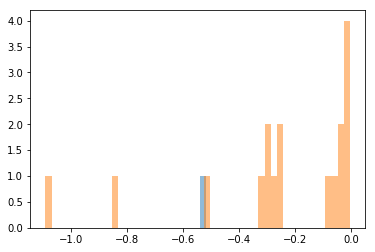

mirSVR-E


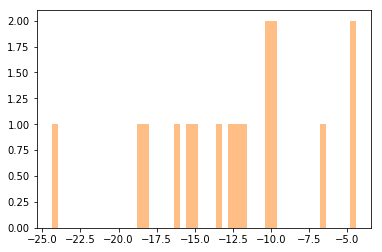

mirSVR-Aln


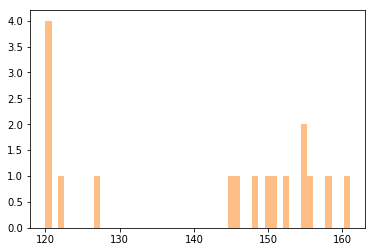

targetScan


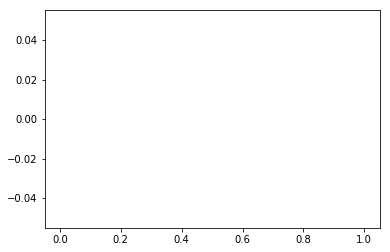

fitCons


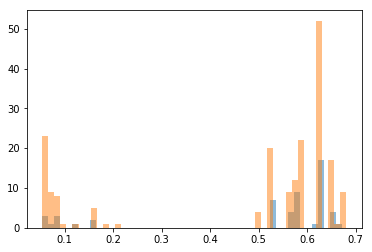

cHmmTssA


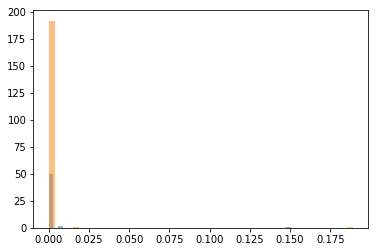

cHmmTssAFlnk


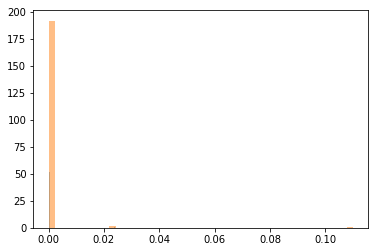

cHmmTxFlnk


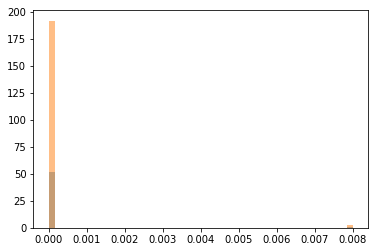

cHmmTx


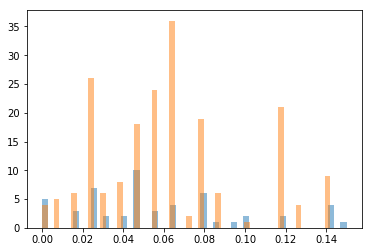

cHmmTxWk


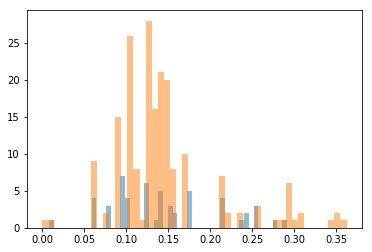

cHmmEnhG


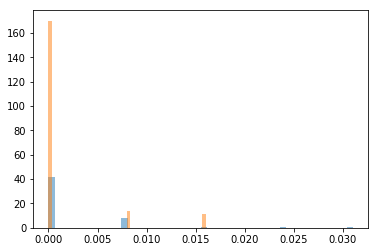

cHmmEnh


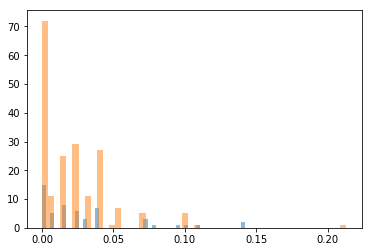

cHmmZnfRpts


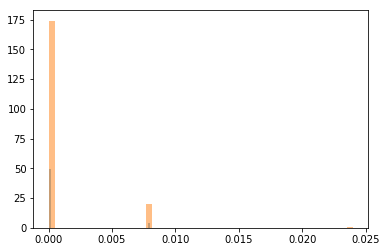

cHmmHet


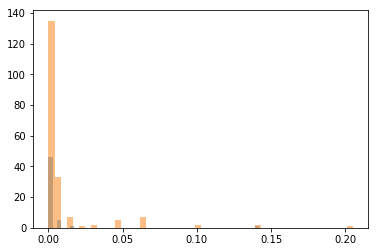

cHmmTssBiv


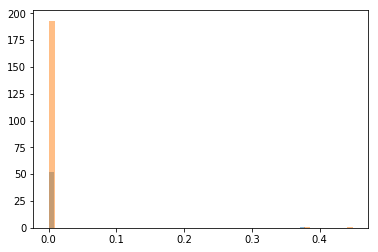

cHmmBivFlnk


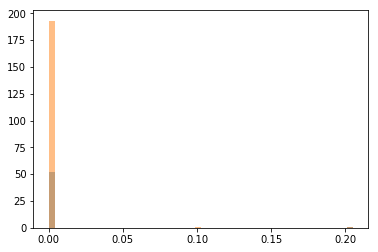

cHmmEnhBiv


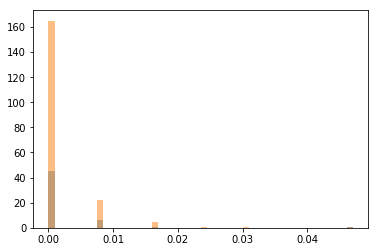

cHmmReprPC


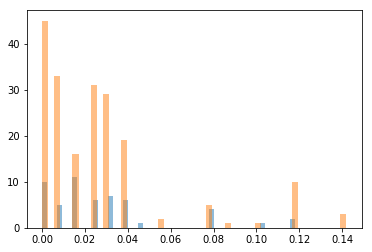

cHmmReprPCWk


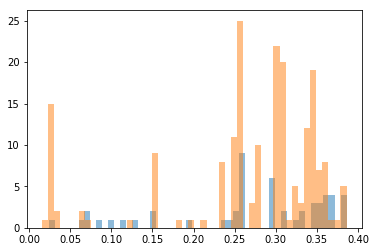

cHmmQuies


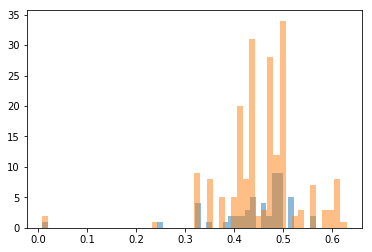

EncExp


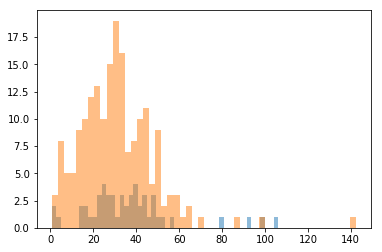

EncH3K27Ac


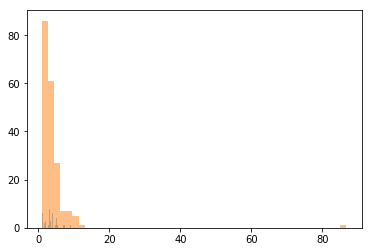

EncH3K4Me1


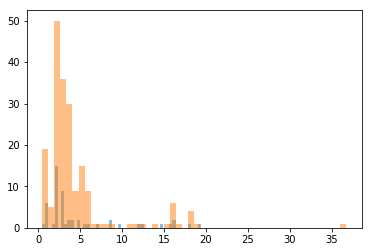

EncH3K4Me3


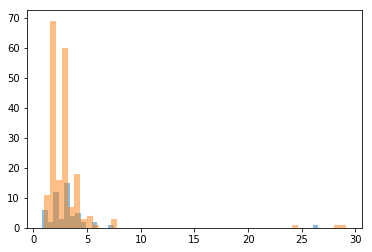

EncNucleo


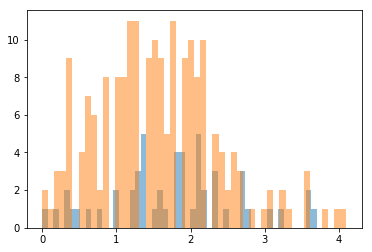

EncOCC


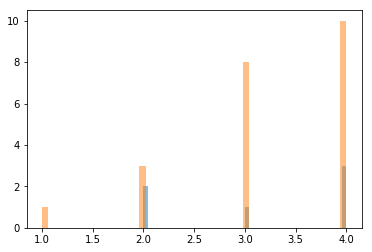

EncOCCombPVal


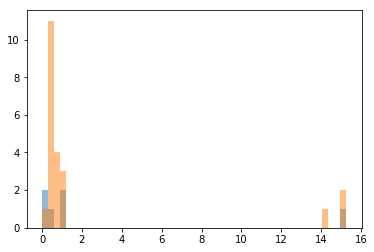

EncOCDNasePVal


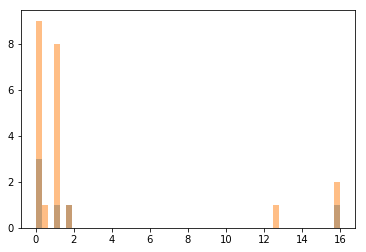

EncOCFairePVal


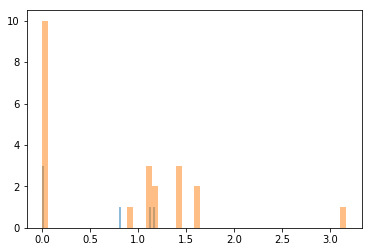

EncOCpolIIPVal


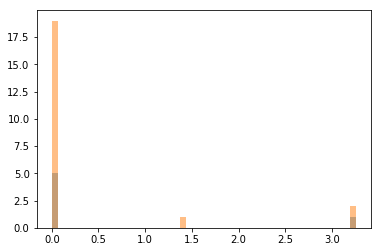

EncOCctcfPVal


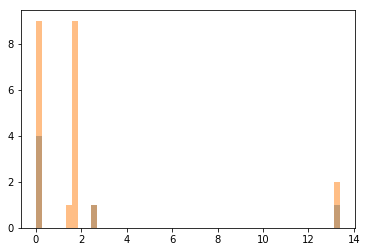

EncOCmycPVal


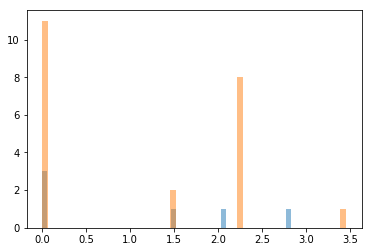

EncOCDNaseSig


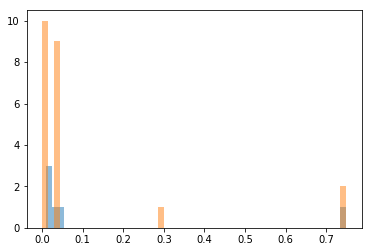

EncOCFaireSig


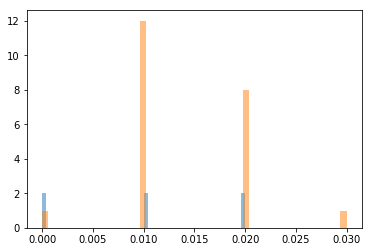

EncOCpolIISig


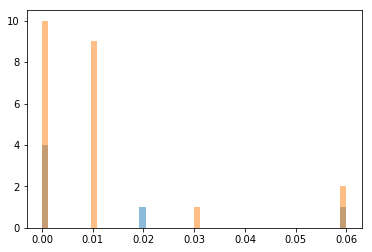

EncOCctcfSig


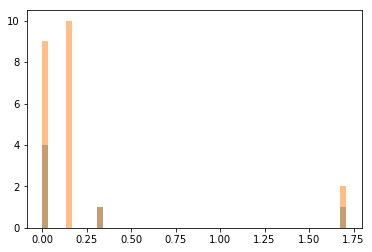

EncOCmycSig


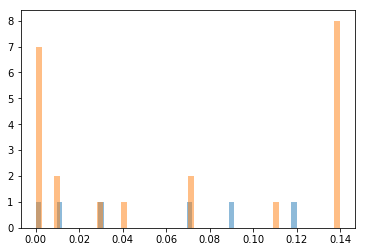

tOverlapMotifs


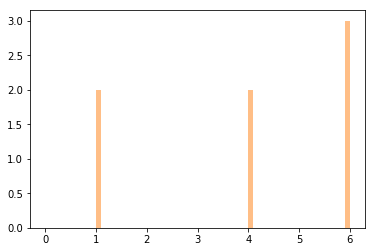

motifDist


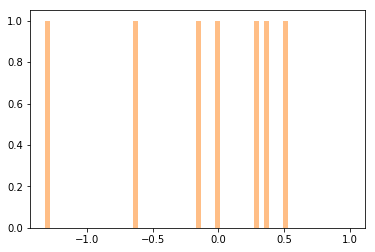

motifECount


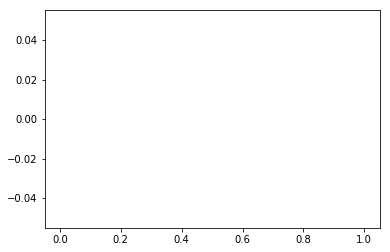

motifEName


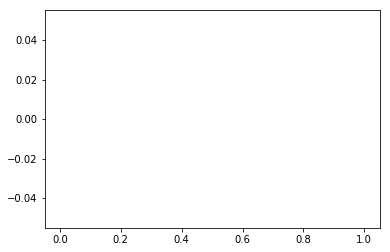

motifEHIPos


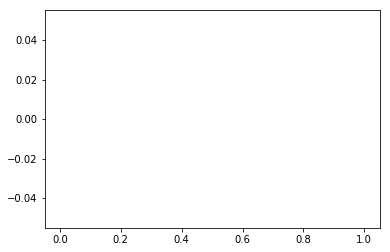

motifEScoreChng


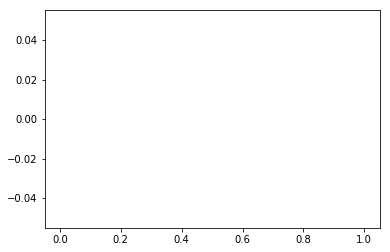

TFBS


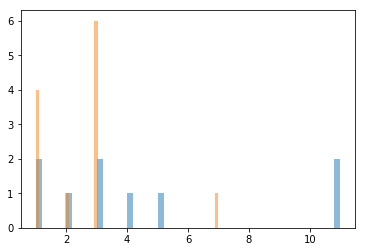

TFBSPeaks


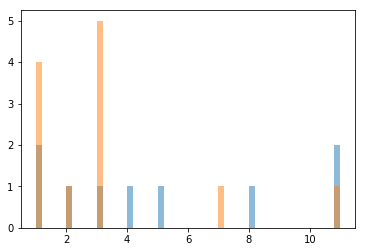

TFBSPeaksMax


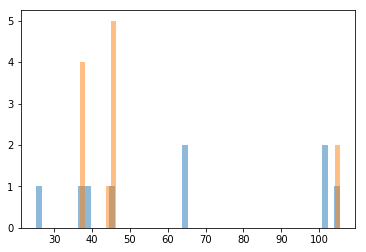

isKnownVariant


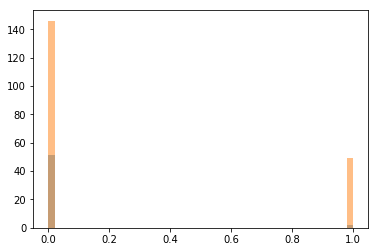

ESP_AF


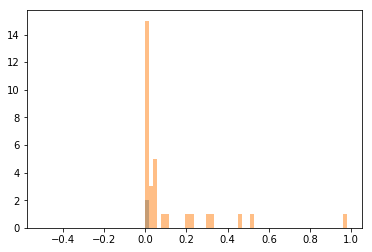

ESP_AFR


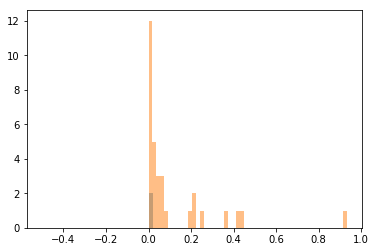

ESP_EUR


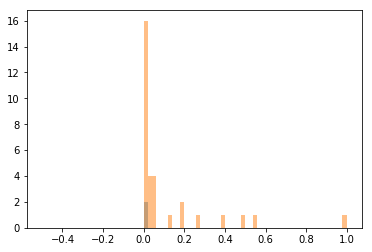

TG_AF


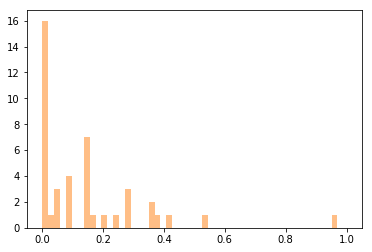

TG_ASN


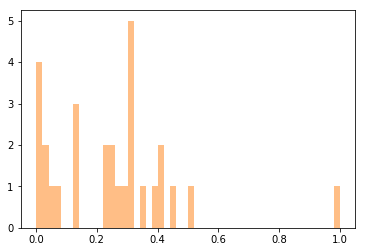

TG_AMR


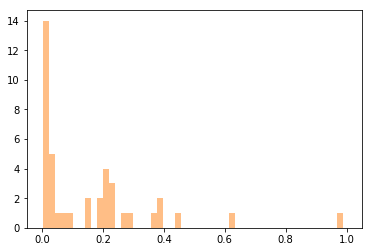

TG_AFR


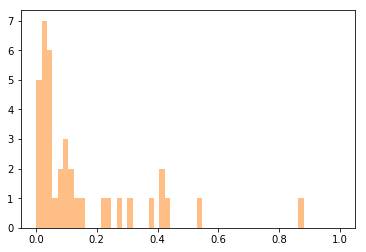

TG_EUR


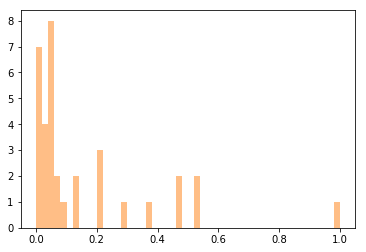

minDistTSS


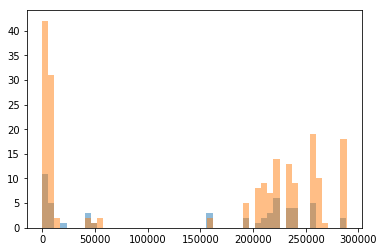

minDistTSE


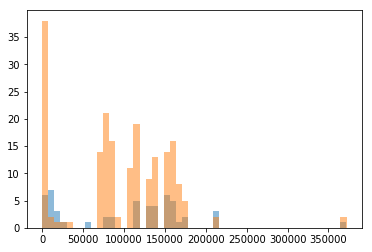

cDNApos


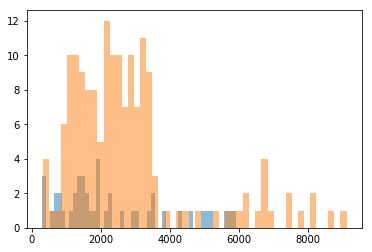

relcDNApos


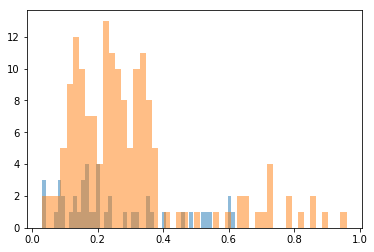

CDSpos


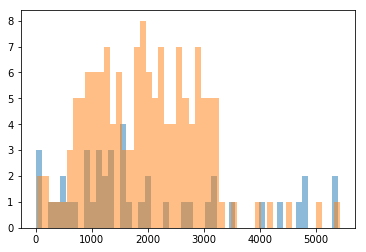

relCDSpos


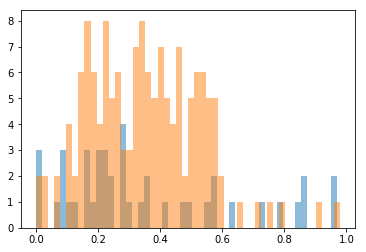

protPos


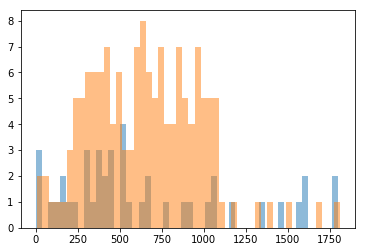

relProtPos


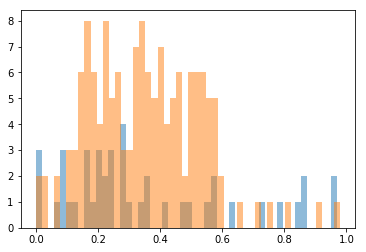

Dst2Splice


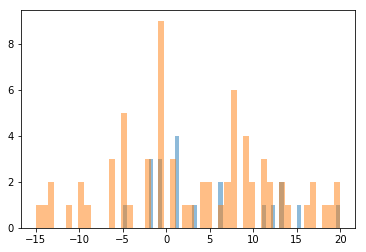

Grantham


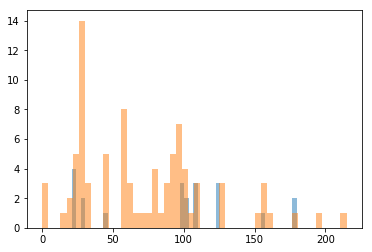

PolyPhenVal


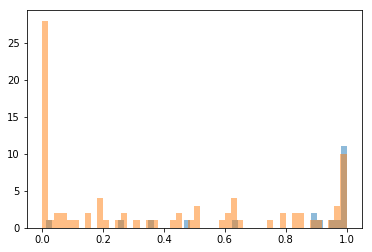

SIFTval


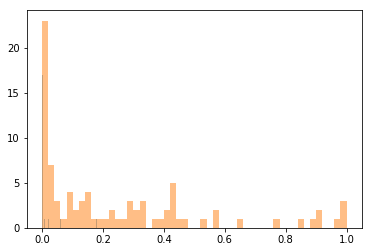

RawScore


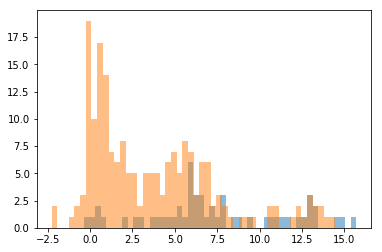

PHRED


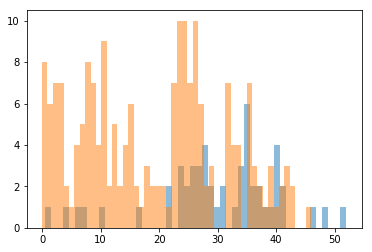

In [11]:
for col in datatable_pd.select_dtypes(exclude=[np.object]).columns:
    print(col)
    hist_compare(datatable_pd,col)